<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/cancer_classification_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# sklearn 에서 제공하는 위스콘신 유방암 데이터 세트를 사용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer.data.shape, cancer.target.shape
# example 개수는 569개, x feature은 30개

((569, 30), (569,))

In [ ]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
cancer.target[:20]
# 0은 병아님(음성), 1은 병(양성)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
# feature 가 너무 많으니 scatter 말고 box plot으로 plot해보자
import matplotlib.pyplot as plt
import numpy as np

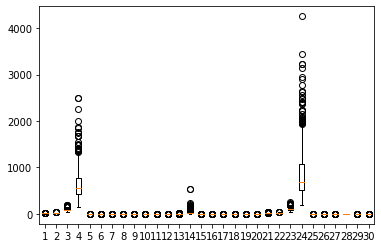

In [ ]:
plt.boxplot(cancer.data)
plt.show()

In [ ]:
# value 분포가 큰 4, 14, 24번 feature 확인
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
np.unique(cancer.target, return_counts=True)
# unique 는 데이터의 고유한 값을 찾아 반환하며, return_counts True는 각 갯수까지 같이 return 한다

# 여기까지가 데이터 확인

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

In [ ]:
# train/ test 셋 나누기 - target 비율을 유지하면서!
from sklearn.model_selection import train_test_split
# train_test_split 함수는 디폴트로 75/25 비율로 나눈다

In [ ]:
# 근데 왜 위에랑은 다르게 split = train_test_split() 같은거 안해도 되는 건가요 똑같은 함수쟈나요!!!!
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)
# stratify는 데이터를 나눌 때 클래스 비율을 동일하게 만든다. 물론 설정 안해도 셔플을 돌리지만 클래스 비율이 불균형한 경우라면 이렇게 지정해주는게 좋다

In [ ]:
x_train.shape, x_test.shape
# 잘 나뉘었군용

((455, 30), (114, 30))

In [ ]:
np.unique(y_test, return_counts=True)
# 비율도 잘 유지되었군요

# 여기까지가 데이터 셋 설정

(array([0, 1]), array([42, 72]))

In [ ]:
class LogisticUnit:
  def __init__(self):
    self.w = None
    self.b = None

  def forward_prop(self, x):
    z = np.sum(self.w * x) + self.b # 벡터라이제이션이 아니다
    a = 1 / (1 + np.exp(-z))
    return a

  def backward_prop(self, x, y, a):
    # 엄청 생략해서 일단 돌아가게 결과값만 넣자
    dw = -(y-a) * x
    db = -(y-a)
    return dw, db

  def fit(self, x, y, epoch=100):
    self.w = np.random.randn(x.shape[1]) #오버플로가 나서 random.randn 에서 변경. 이러면 해결되나? 안되네.. 오버플로는 어떻게 해결하는거지ㅜㅜ
    self.b = 0
    for i in range(epoch):
      for x_i, y_i in zip(x, y):
        a = self.forward_prop(x_i)
        dw, db = self.backward_prop(x_i, y_i, a)
        self.w -= dw
        self.b -= db

  def predict(self, x):
    z = [self.forward_prop(x_i) for x_i in x]
    z = np.array(z)
    a = 1 / (1 + np.exp(-z))
    return a > 0.5

  '''def predict(self, x):
    a = []
    for x_i in x:
      z = np.sum(self.w * x) + self.b
      a.append(1 / (1 + np.exp(-z)))
      y_hat = [i > 0.5 for i in a]
    return y_hat'''

In [ ]:
unit = LogisticUnit()

In [ ]:
unit.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [ ]:
np.mean(unit.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


0.8771929824561403

In [ ]:
unit.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
        True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True])